# Pitch Analysis

Please submit a coherent, readable notebookthat walks Dhrumil and Aishi through the exploratory data analysis and regression analysis you've done in pursuit of your story.

This notebook should be clean and focused:

- move any code for data acquisition or scraping into it's own notebook with a name like `scraping.ipynb`
- move any code for data cleaning and maniupualtion into it's own notebook with a name like `cleaning.ipynb`
- you may even want to make a notebook called `scratchpad.ipynb` to keep your messy analysis, you can carefully move the relevant parts to `analysis.ipynb` and make sure it's written in such a way that Dhrumil and Aishi can follow your logic
    - add text to guide a reader through this notebook, you may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts.
- make sure `analysis.ipynb` runs (restart and run all cells) from top to bottom without errors


## Setup

This section contains our standard notebook setup, including Python and R Imports. You can zoom right past this! 


In [12]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

R imports

In [14]:
%%R

# My commonly used R imports

require('tidyverse')

Python imports

In [15]:
# installs any python packages in requirements.txt
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [16]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import epitools as epi

## Loading The Data

_Load the cleaned data here. You're welcome to load multiple dataframes if that makes sense._
- _What is each row? Make sure to explain if it's not obvious._
- _Make sure to mention any caveats of the data we need to be aware of._
- _Make mention of any methodological choices you made in `cleaning.ipynb` that you think are relevant._
- _Display a small chunk of the data with something like `df.head()` or df.sample(5)`, so that we have an idea of what we're working with._


In [17]:
# read pdf file acs_long.csv

acs_steps = pd.read_csv('acs_steps.csv')
acs_steps.head()

,race,step,count
0,black,0,34923
1,hispanic,0,41247
2,white,0,6463
3,asian,0,5110
4,multiple-race,0,2913


In [18]:
cd_data = pd.read_csv('cd_data.csv')
cd_data.head()


,cd_num,council_num,intakes,foster,pct_foster,median_income,pct_poverty,pct_white,pct_black,pct_hispanic,population,pct_intakes,pct_foster.1,children_poverty,LAT,LON
0,bronx-1,8,1421,65,4.6,21663,37.1,1.6,25.9,70.9,91497,1.5531,0.0710,43.3,40.846651,-73.878594
1,bronx-2,17,791,41,5.2,21663,38.5,1.3,22.1,74.8,52246,1.5140,0.0785,43.6,40.802564,-73.872973
2,bronx-3,16,1278,42,3.3,22145,39.6,1.2,57.7,39.4,79762,1.6023,0.0527,45.5,40.846651,-73.878594
3,bronx-4,16,1548,64,4.1,27166,39.6,1.5,63.1,32.3,146441,1.0571,0.0437,45.5,40.846651,-73.878594
4,bronx-5,14,1258,42,3.3,25600,36.0,1.4,28.7,66.8,128200,0.9813,0.0328,43.8,40.846651,-73.878594


## Exploratory Analysis

_In the cells below, guide us through your exploratory data analysis. You may include charts and regressions as you see fit._


_You may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts. You can make a separate `scratchpad.ipynb` to store analysis that you were trying out but isn't ultimately relevant to your pitch. You don't need to rewrite your pitch here, but please make sure to include enough text for Dhrumil and Aishi to be able to follow your logic._

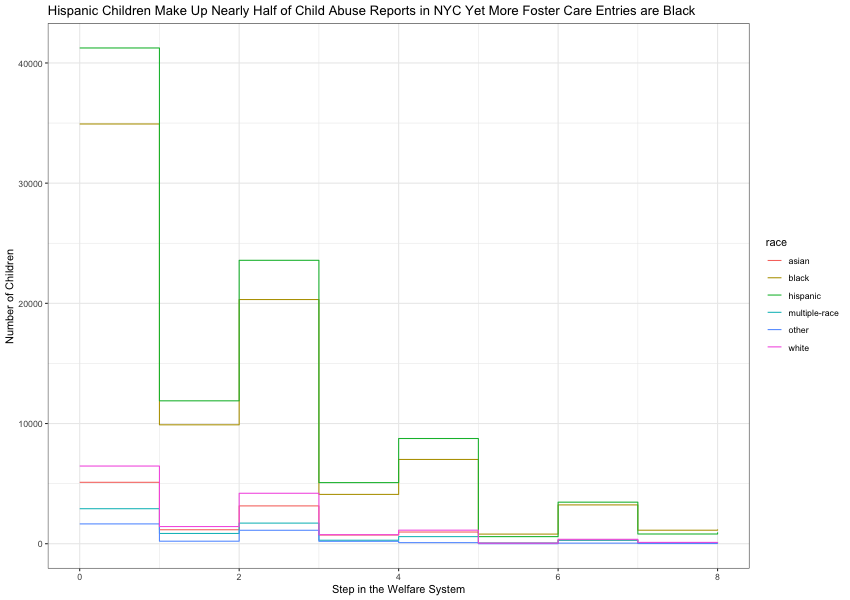

In [19]:
%%R -i acs_steps -w 850 -h 600

ggplot(acs_steps, aes(x = step, y = count, color = race, group = race)) +
    geom_step() +
    labs(title = 'Hispanic Children Make Up Nearly Half of Child Abuse Reports in NYC Yet More Foster Care Entries are Black', x = 'Step in the Welfare System', y = 'Number of Children') +
    theme_bw()



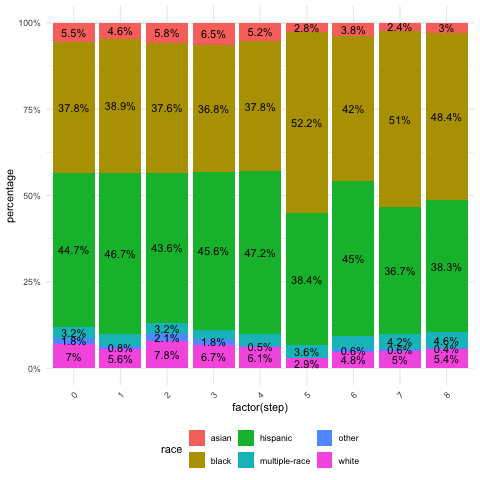

In [20]:
%%R -i acs_steps
library(dplyr)
library(ggplot2)

acs_steps <- acs_steps %>%
  group_by(step) %>%
  mutate(total = sum(count)) %>%
  ungroup() %>%
  mutate(percentage = (count / total)*100) %>%
  arrange(step, desc(race))

ggplot(acs_steps, aes(x = factor(step), y = percentage, fill = race)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5), check_overlap = TRUE) +  # Label the percentage on the bars
  scale_y_continuous(labels = scales::percent) +
  theme_minimal() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))

### T-test and Chi-squared tests

In [21]:
%%R

# t-test for the difference in means between the percentage of hispanic children and white children in the scr_intakes

scr_intakes_hispanic = 41247
scr_intakes_black = 34923

t.test(c(scr_intakes_hispanic, scr_intakes_black), alternative = 'two.sided', mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)



	One Sample t-test



data:  c(scr_intakes_hispanic, scr_intakes_black)
t = 12.045, df = 1, p-value = 0.05273
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2092.019 78262.019
sample estimates:
mean of x 
    38085 



In [22]:
%%R
# black and hispanic children
cross_table <- matrix(c(34923, 1197, 41247, 947), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'foster')
cross_table

         intakes foster
black      34923   1197
hispanic   41247    947


In [23]:
%%R
# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 83.606, df = 1, p-value < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


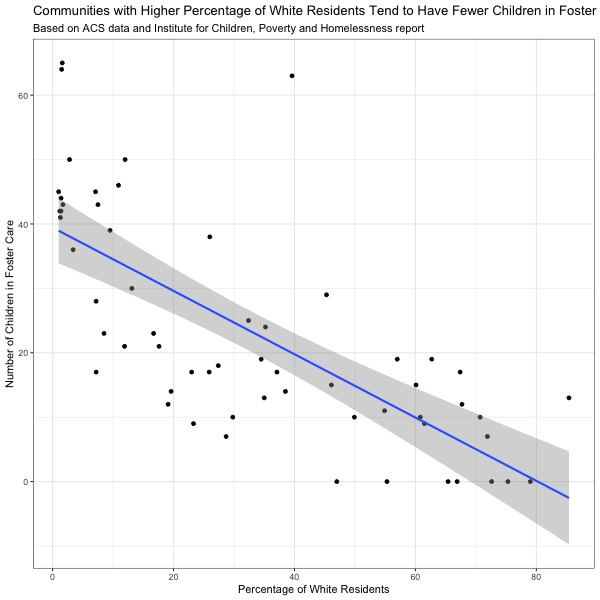

In [24]:
%%R -i cd_data -w 600 -h 600

ggplot(cd_data,aes(y=foster,x=pct_white))+geom_point()+geom_smooth(method="lm")+
labs(title = 'Communities with Higher Percentage of White Residents Tend to Have Fewer Children in Foster Care',subtitle = 'Based on ACS data and Institute for Children, Poverty and Homelessness report', x = 'Percentage of White Residents', y = 'Number of Children in Foster Care')+
theme_bw()

`geom_smooth()` using formula = 'y ~ x'


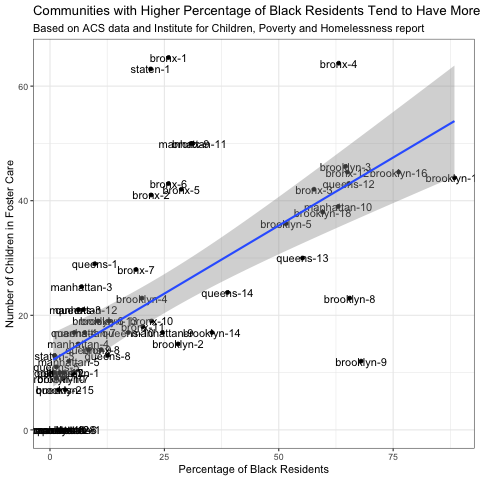

In [25]:
%%R
# do a scatterplot for pct_black and foster

ggplot(cd_data,aes(y=foster,x=pct_black))+
geom_point()+
labs(title = 'Communities with Higher Percentage of Black Residents Tend to Have More Children in Foster Care',subtitle = 'Based on ACS data and Institute for Children, Poverty and Homelessness report', x = 'Percentage of Black Residents', y = 'Number of Children in Foster Care')+
geom_text(aes(label = cd_num))+
geom_smooth(method="lm")+
theme_bw()

`geom_smooth()` using formula = 'y ~ x'


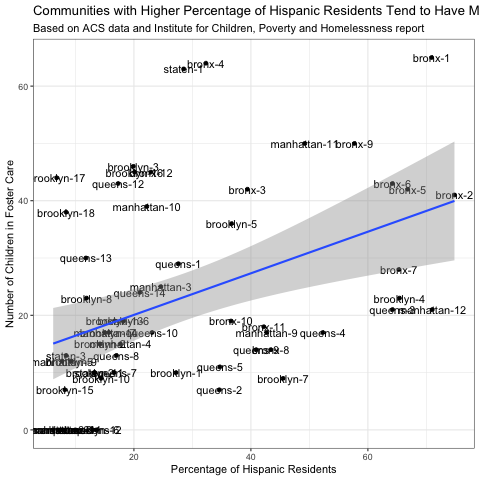

In [26]:
%%R
# do a scatterplot for pct_hispanic and foster

ggplot(cd_data,aes(y=foster,x=pct_hispanic))+
geom_point()+
labs(title = 'Communities with Higher Percentage of Hispanic Residents Tend to Have More Children in Foster Care',subtitle = 'Based on ACS data and Institute for Children, Poverty and Homelessness report', x = 'Percentage of Hispanic Residents', y = 'Number of Children in Foster Care')+
geom_text(aes(label = cd_num))+
geom_smooth(method="lm")+
theme_bw()

## Statistical Tests of Each Step of the Child Welfare System

In [27]:
%%R

# t-test for the difference in means between the percentage of hispanic children and white children in the scr_intakes

scr_intakes_white = 6463
scr_intakes_black = 34923

t.test(c(scr_intakes_white, scr_intakes_black), alternative = 'two.sided', mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)



	One Sample t-test

data:  c(scr_intakes_white, scr_intakes_black)
t = 1.4542, df = 1, p-value = 0.3835
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -160116.3  201502.3
sample estimates:
mean of x 
    20693 



In [28]:
%%R
# indicated investigations cases black and white children
cross_table <- matrix(c(34923, 9893, 6463, 1428), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'white')
colnames(cross_table) <- c('intakes', 'indicated')
cross_table

# black and white children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 62.959, df = 1, p-value = 2.111e-15



In [29]:
%%R
# unsubstantiated cases black and white children
cross_table <- matrix(c(34923, 20317, 6463, 4198), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'white')
colnames(cross_table) <- c('intakes', 'unsubstantiated')
cross_table

# black and white children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 25.812, df = 1, p-value = 3.763e-07



In [30]:
%%R
# CARES cases black and white children
cross_table <- matrix(c(34923, 4103, 6463, 752), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'white')
colnames(cross_table) <- c('intakes', 'cares')
cross_table

# black and white children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 0.053394, df = 1, p-value = 0.8173



In [31]:
%%R
# Foster care black and white children
cross_table <- matrix(c(34923, 1197, 6463, 134), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'white')
colnames(cross_table) <- c('intakes', 'foster')
cross_table

# black and white children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 30.404, df = 1, p-value = 3.508e-08



In [32]:
%%R
# indicated investigations cases black and hispanic children
cross_table <- matrix(c(34923, 9893, 41247, 11889), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'indicated')
cross_table

# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 1.2649, df = 1, p-value = 0.2607



In [33]:
%%R
# unsubstantiated investigations cases black and hispanic children
cross_table <- matrix(c(34923, 20317, 41247, 23581), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'unsubstantiated')
cross_table

# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 2.1071, df = 1, p-value = 0.1466



In [34]:
%%R
# cares cases black and hispanic children
cross_table <- matrix(c(34923, 4103, 41247, 5085), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'cares')
cross_table

# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 4.6997, df = 1, p-value = 0.03017



In [35]:
%%R
# foster care entries black and hispanic children
cross_table <- matrix(c(34923, 1197, 41247, 947), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'foster')
cross_table

# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 83.606, df = 1, p-value < 2.2e-16



## Multivariable Regression

In [36]:
%%R -i cd_data
# linear regression model for pct_intakes and children_poverty, pct_black, pct_hispanic

lm_model <- lm(pct_intakes ~ children_poverty + pct_black + pct_hispanic, data = cd_data)
summary(lm_model)


Call:
lm(formula = pct_intakes ~ children_poverty + pct_black + pct_hispanic, 
    data = cd_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48985 -0.12372 -0.00442  0.07536  0.54249 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.037887   0.065347  -0.580  0.56443    
children_poverty  0.010415   0.003693   2.820  0.00666 ** 
pct_black         0.007655   0.001388   5.516 9.59e-07 ***
pct_hispanic      0.006999   0.002081   3.364  0.00141 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2236 on 55 degrees of freedom
Multiple R-squared:  0.6916,	Adjusted R-squared:  0.6747 
F-statistic: 41.11 on 3 and 55 DF,  p-value: 4.501e-14



In [37]:
%%R -i cd_data
# inverse linear regression model for pct_intakes and children_poverty, pct_white

lm_model <- lm(pct_intakes ~ children_poverty + pct_white, data = cd_data)
summary(lm_model)


Call:
lm(formula = pct_intakes ~ children_poverty + pct_white, data = cd_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45542 -0.13821 -0.03580  0.07137  0.61905 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.493225   0.124322   3.967 0.000209 ***
children_poverty  0.013886   0.003420   4.061 0.000154 ***
pct_white        -0.006916   0.001611  -4.292  7.1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.242 on 56 degrees of freedom
Multiple R-squared:  0.6322,	Adjusted R-squared:  0.6191 
F-statistic: 48.13 on 2 and 56 DF,  p-value: 6.878e-13



`geom_smooth()` using formula = 'y ~ x'


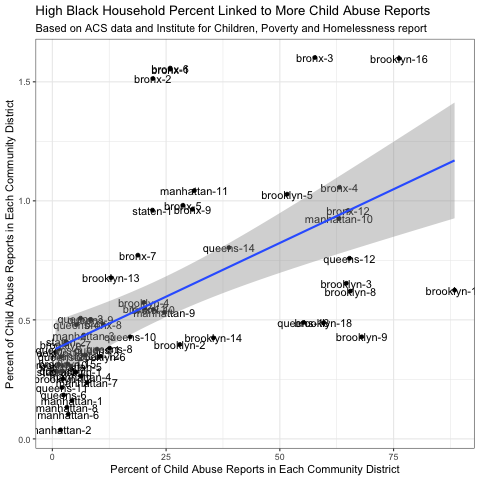

In [38]:
%%R
#scatterplot for pct_black and pct_intakes

ggplot(cd_data,aes(y=pct_intakes,x=pct_black))+
geom_point()+
labs(title = 'High Black Household Percent Linked to More Child Abuse Reports',subtitle = 'Based on ACS data and Institute for Children, Poverty and Homelessness report', x = 'Percent of Child Abuse Reports in Each Community District', y = 'Percent of Child Abuse Reports in Each Community District')+
geom_text(aes(label = cd_num))+
geom_smooth(method="lm")+
theme_bw()

`geom_smooth()` using formula = 'y ~ x'


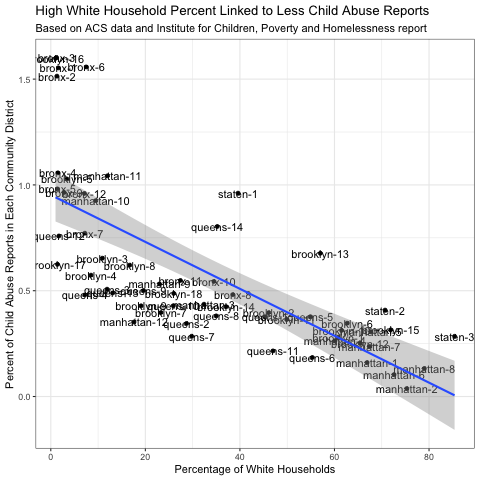

In [39]:
%%R width=1000

ggplot(cd_data,aes(y=pct_intakes,x=pct_white))+
geom_point()+
labs(title = 'High White Household Percent Linked to Less Child Abuse Reports',subtitle = 'Based on ACS data and Institute for Children, Poverty and Homelessness report', x = 'Percentage of White Households', y = 'Percent of Child Abuse Reports in Each Community District')+
geom_text(aes(label = cd_num))+
geom_smooth(method="lm")+
theme_bw()

## Sort Residuals

### Percent Black Households

In [47]:
%%R

model <- lm(pct_intakes ~ children_poverty, data = cd_data)


resids <- residuals(model)
resid_df <- data.frame(cd_num = cd_data$cd_num, resids = resids)
resid_df <- resid_df[order(resid_df$resids), ]

print(resid_df)

         cd_num       resids
12   brooklyn-1 -0.567248410
23  brooklyn-12 -0.539867223
18   brooklyn-7 -0.479039004
13   brooklyn-2 -0.451548410
46     queens-5 -0.426788303
41 manhattan-12 -0.426221926
30  manhattan-1 -0.329419123
14   brooklyn-3 -0.257102246
31  manhattan-2 -0.231518589
15   brooklyn-4 -0.230388303
22  brooklyn-11 -0.223936202
48     queens-7 -0.219064420
38  manhattan-9 -0.209334467
45     queens-4 -0.207377496
20   brooklyn-9 -0.193899444
43     queens-2 -0.184230798
21  brooklyn-10 -0.163673826
26  brooklyn-15 -0.137831665
32  manhattan-3 -0.130718256
7       bronx-8 -0.122305715
47     queens-6 -0.115033399
4       bronx-5 -0.085224728
17   brooklyn-6 -0.076016855
42     queens-1 -0.069159017
44     queens-3 -0.059718256
3       bronx-4 -0.048936402
35  manhattan-6 -0.033138269
19   brooklyn-8 -0.027265821
25  brooklyn-14 -0.012162152
40 manhattan-11 -0.011803647
52    queens-11 -0.007234266
33  manhattan-4 -0.005818589
37  manhattan-8  0.002934380
9      bronx-1

In [40]:
%%R

model <- lm(pct_intakes ~ pct_black + pct_poverty + pct_hispanic, data = cd_data)


resids <- residuals(model)
resid_df <- data.frame(cd_num = cd_data$cd_num, resids = resids)
resid_df <- resid_df[order(resid_df$resids), ]

print(resid_df)

         cd_num        resids
41 manhattan-12 -0.4691800790
20   brooklyn-9 -0.3889083585
14   brooklyn-3 -0.3217466216
15

   brooklyn-4 -0.3148844629
12   brooklyn-1 -0.2887519981
18   brooklyn-7 -0.2869708477
13   brooklyn-2 -0.2565225200
38  manhattan-9 -0.2499070679
28  brooklyn-17 -0.2002348708
19   brooklyn-8 -0.1836160434
23  brooklyn-12 -0.1722082820
44     queens-3 -0.1702904640
45     queens-4 -0.1681763958
46     queens-5 -0.1655613713
3       bronx-4 -0.1320016549
4       bronx-5 -0.1284887206
30  manhattan-1 -0.1088352742
29  brooklyn-18 -0.0976091235
31  manhattan-2 -0.0938362307
7       bronx-8 -0.0803876434
43     queens-2 -0.0733401181
25  brooklyn-14 -0.0635934614
54    queens-13 -0.0513118269
48     queens-7 -0.0404292868
39 manhattan-10 -0.0297648005
10     bronx-11 -0.0294395912
42     queens-1 -0.0186933911
9      bronx-10 -0.0104190227
35  manhattan-6 -0.0013123033
8       bronx-9  0.0005093217
47     queens-6  0.0024514048
6       bronx-7  0.0060396794
16   brooklyn-5  0.0105379704
17   brooklyn-6  0.0134092147
40 manhattan-11  0.0163380760
33  manhattan-4  0.0218508137
37  manhatta

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 



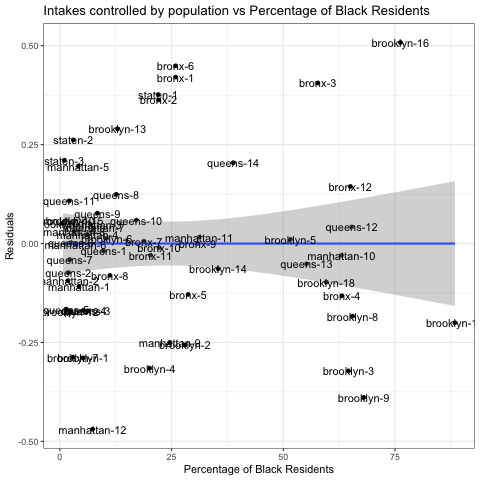

In [41]:
%%R 

# plot sorted residuals of Black residents

ggplot(cd_data, aes(x = pct_black, y = resids, label = cd_num)) +
    geom_point() +
    geom_smooth(method = "lm") +
    geom_text(aes(label = cd_num)) + 
    labs(title = 'Intakes controlled by population vs Percentage of Black Residents', x = 'Percentage of Black Residents', y = 'Residuals') +
    theme_bw()


## Q-Q Plot

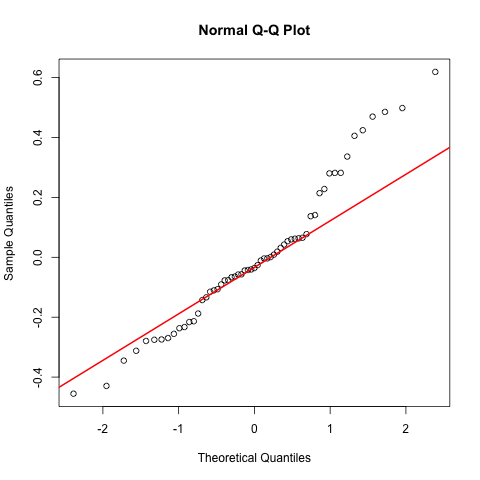

In [42]:
%%R -i cd_data

# Extract the residuals
resid <- resid(lm_model)

# Q-Q plot with confidence bands
qqnorm(resid, main = "Normal Q-Q Plot")
qqline(resid, col = "red", lwd = 2)


## Odds Ratio

In [43]:
%%R

data <- data.frame(
  outcome = c(rep(0, 2), rep(1, 2)),
  race = c(rep("black", 2), rep("hispanic", 2)),
  count = c(34923, 41247, 1197, 947)
)

In [44]:
%%R
logistic <- glm(outcome ~ race, data = data, family = "binomial")

summary(logistic)



Call:
glm(formula = outcome ~ race, family = "binomial", data = data)

Coefficients:
            

 Estimate Std. Error z value Pr(>|z|)
(Intercept)    -23.57   56188.12   0.000        1
racehispanic    47.13   79462.01   0.001        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5.5452e+00  on 3  degrees of freedom
Residual deviance: 4.6610e-10  on 2  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 22



In [45]:
%%R

exp(coef(logistic))

 (Intercept) racehispanic 
5.826215e-11 2.945962e+20 


In [46]:
%%R
# Define the values
black_intakes <- 34923
hispanic_intakes <- 41247
black_foster <- 1197
hispanic_foster <- 947

# Calculate the odds of foster care for Black children
odds_black <- black_foster / black_intakes

# Calculate the odds of foster care for Hispanic children
odds_hispanic <- hispanic_foster / hispanic_intakes

# Calculate the odds ratio
odds_ratio <- odds_black / odds_hispanic

# Print the results
cat("Odds of foster care for Black children:", odds_black, "\n")
cat("Odds of foster care for Hispanic children:", odds_hispanic, "\n")
cat("Odds ratio (Black vs. Hispanic):", odds_ratio, "\n")

Odds of foster care for Black children: 0.03427541 
Odds of foster care for Hispanic children: 0.02295925 
Odds ratio (Black vs. Hispanic): 1.49288 
